In [1]:
import logging

logger = logging.getLogger('requests_throttler')
logger.addHandler(logging.NullHandler())
logger.propagate = False

## Cantor-Lebesgue Function (The Devil's Staircase)

(In what follows I have used __Measure, Integration & Real Analysis__ by _Sheldon Axler_ and __Measure And Integral: An Introduction to Real Analysis__ by _Richard L. Wheeden, Antoni Zygmund_ as the main resources.)


We use __Cantor set__ and __Cantor-Lebesgue function__ to stretch our intuition when dealing with Lebesgue measure. We assume the reader is already familiar with Cantor set and its properties. In what follows we briefly review some properties of the Cantor set.

__Lemma__. _The Cantor set $C$ is the set of numbers in $[0, 1]$ that have a base $3$ representation consisting of only $0s$ and $2s$._  


__Properties__:

- The Cantor set is a closed subset of $\mathbb{R}$.

- item The Cantor set has Lebesgue measure $0$.

- item The Cantor set contains no interval with more than one element.



__Definition__. _The __<font color=red>Cantor-Lebesgue function</font>__ $L: [0, 1] \rightarrow [0,1]$ is defined by converting base $3$ representations into base $2$ representations as follows_:

- _If $x \in C$, then $L(x)$ is computed by replacing all $2s$ in the unique representation of $x$ by $1s$._


- _If $x \in [0,1] \backslash C$, then $L(x)$ is computed by truncating $x$ after the first $1$ in its $3$ base representation, and replacing all the remaining $2s$ by $1s$._


Alternatively, we could also define the \textit{Cantor-Lebesgue function} as the limit of a sequence of functions: let $D_k=[0,1] \backslash C_k$, where $C_k$ is the Kth step in constructing $C$ by removing the middle thirds. $D_k$ consists of $2^k-1$ intervals $I_j^k$ (ordered from left to right). Define $L_k$ to be a continuous function on $[0,1]$ which satisfies $L_k(0)=0$, $L_k(1)=1$, $L_k(x)=j 2^{-k}$ on $I_j^k$ for $j=1, ..., 2^k-1$, and which is linear on each interval of $C_k$. 

Graphs of the first five functions in the sequence, i.e., $L_0$, $L_1$, $L_2$, $L_3$ and $L_4$, are shown below:


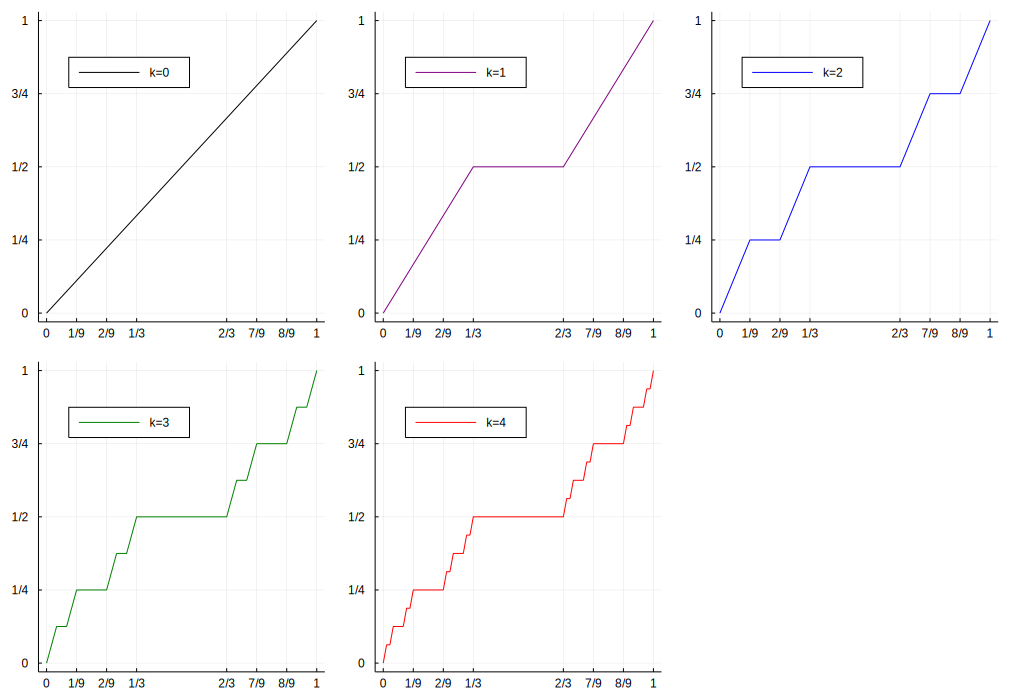

In [1]:
using Plots

t = Array(0:1/750:1)

plt=plot(10,xlim=(0,1), xticks=([0, 1/27, 1/9, 2/9, 7/27, 8/27, 1/3, 2/3, 19/27, 20/27, 7/9, 8/9, 25/27, 26/27, 1], ["0", "1/27", "2/27", "1/9", "2/9", "7/27", "8/27", "1/3", "2/3", "19/27", "20/27", "7/9", "8/9", "25/27", "26/27", "1"]), yticks=([0, 1/16, 1/8, 3/16, 1/4, 5/16, 3/8, 7/16, 1/2, 9/16, 5/8, 11/16, 3/4, 13/16, 7/8, 15/16, 1], ["0", "1/16", "1/8", "3/16", "1/4", "5/16", "3/8", "7/16", "1/2", "9/16", "5/8", "11/16", "3/4", "13/16", "7/8", "15/16", "1"]), c=:blue, size=(1000, 1000), aspect_ratio=1,legend=false)
    
f0(t) = t

p0 = plot(t, f0, c=:black, label= "k=0")

    
    function heaviside(t)
   0.5 * (sign(t) + 1)
end

function interval(t, a, b)
   heaviside(t-a) - heaviside(t-b)
end

function f1(t)
   3/2 .* t .* interval(t,0,1/3) + 1/2 .* interval(t, 1/3,2/3)+ (3/2 .* t - 1/2) .* interval(t, 2/3,1+0.0000001)
end


p1 = plot(t, f1, c=:purple, label="k=1")    


    function f2(t)
   9/4 .* t .* interval(t,0,1/9) + 1/4 .* interval(t, 1/9,2/9)+ (9/4 .* t - 1/4) .* interval(t, 2/9,1/3)+1/2 .* interval(t, 1/3,2/3) + (9/4 .* t -1) .* interval(t, 2/3,7/9) + 3/4 .* interval(t, 7/9,8/9) + (9/4 .*t -5/4) .* interval(t, 8/9,1+0.00001)
end
    
p2 = plot(t, f2, c=:blue, label="k=2")   
    

function f3(t)
   27/8 .* t .* interval(t,0,1/27) + 1/8 .* interval(t, 1/27, 2/27)+(27/8 .* t - 1/8) .* interval(t, 2/27,1/9) + 1/4 .* interval(t, 1/9,2/9) + (27/8 .* t - 1/2) .* interval(t, 2/9,7/27) + 3/8 .* interval(t, 7/27,8/27) + (27/8 .*t -5/8) .* interval(t, 8/27,1/3) + 1/2 .* interval(t, 1/3, 2/3) + (27/8 .*t -7/4) .* interval(t, 2/3,19/27) + 5/8 .* interval(t, 19/27,20/27)+(27/8 .*t -15/8) .* interval(t, 20/27,7/9) + 3/4 .* interval(t, 7/9, 8/9) + (27/8 .*t -9/4) .* interval(t, 8/9, 25/27) + 7/8 .* interval(t, 25/27,26/27) + (27/8 .*t -19/8) .* interval(t, 26/27,1+0.00001)
end
    
p3 = plot(t, f3, c=:green, label="k=3")   
    
    
function f4(t)
   81/16 .* t .* interval(t,0,1/81) + 1/16 .* interval(t, 1/81, 2/81)+(81/16 .* t - 1/16) .* interval(t, 2/81, 1/27) + 1/8 .* interval(t, 1/27,2/27) + (81/16 .* t - 1/4) .* interval(t, 2/27,7/81) + 3/16 .* interval(t, 7/81,8/81) + (81/16 .*t -5/16) .* interval(t, 8/81, 1/9) + 1/4 .* interval(t, 1/9, 2/9) + (81/16 .*t -7/8) .* interval(t, 18/81,19/81) + 5/16 .* interval(t, 19/81,20/81) + (81/16 .*t -15/16) .* interval(t, 20/81,7/27) + 3/8 .* interval(t, 7/27, 8/27) + (81/16 .*t -9/8) .* interval(t, 8/27, 25/81) + 7/16 .* interval(t, 25/81,26/81) + (81/16 .*t -19/16) .* interval(t, 26/81,1/3) + 1/2 .* interval(t, 1/3, 2/3) + (81/16 .*t -23/8) .* interval(t, 2/3,55/81) + 9/16 .* interval(t, 55/81,56/81) + (81/16 .*t - 47/16) .* interval(t, 56/81,19/27) + 5/8 .* interval(t, 19/27,20/27) + (81/16 .*t -25/8) .* interval(t, 20/27,61/81) + 11/16 .* interval(t, 61/81,62/81) + (81/16 .*t -51/16) .* interval(t, 62/81,7/9) + 3/4 .* interval(t, 7/9,8/9) + (81/16 .*t -15/4) .* interval(t, 8/9,73/81) + 13/16 .* interval(t, 73/81,74/81) + (81/16 .*t -61/16) .* interval(t, 74/81,25/27) + 7/8 .* interval(t, 25/27,26/27) + (81/16 .*t -4) .* interval(t, 26/27, 79/81) + 15/16 .* interval(t, 79/81,80/81) + (81/16 .*t -65/16) .* interval(t, 80/81,1+0.0001)                                                                                                                                                                                                    
end
    
p4 = plot(t, f4, c=:red, label="k=4")    
    

plot(p0, p1, p2, p3, p4, legend=:topleft, xticks=([0, 1/9, 2/9, 1/3, 2/3, 7/9, 8/9, 1], ["0", "1/9", "2/9", "1/3", "2/3", "7/9", "8/9", "1"]), yticks=([0, 1/4, 1/2, 3/4, 1], ["0", "1/4", "1/2", "3/4", "1"]),size=(1010, 700))







Each $L_k$ is increasing, $L_{k+1}=L_k$ on $I_j^k$ for $j=1,..., 2^k-1$, and $\left|L_k-L_{k+1} \right| < \dfrac{1}{2^k}$. Thus the sum $\sum\limits_{k=0}^n \, (L_k-L_{k+1})$ converges uniformly on $[0, 1]$, which in turn implies that $\{L_k\}$ converges uniformly on $[0, 1]$. Define $L=\lim\limits_{k \rightarrow \infty}\, L_k$; then $L(0)=0$, $L(1)=1$, $L$ is continuous and increasing, and $L$ is constant on every removed interval in constructing $C$. This $L$ is called _Cantor-Lebesgue_ function, also known as _The Devil's Staircase_. 

__Definition__. _A function $f$ for which $f'$ is zero a.e. in $[a, b]$ is said to be __<font color=red>singular</font>__ on $[a, b]$._



The Cantor-Lebesgue function is an example of a non-canstant singular function on $[0,1]$.

__Theorem__. _If $f$ is both absolutely continuous and singular on $[a, b]$, then it is constant on $[a, b]$._

__Proof__. _See Wheeden-Zygmund for a proof._


From this theorem we immediately conclude an important property of the function $L$:

__Corollary__. _The Cantor-Lebesgue function $L$ is an example of a continuous function which is not absolutely continuous._

The following animation shows the functions $L_1$, $L_2$, $L_3$ and $L_4$, all at once so that you can compare them to each other:



┌ Info: Saved animation to 
│   fn = /Users/alirezahosseinkhan/tmp.gif
└ @ Plots /Users/alirezahosseinkhan/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/Users/alirezahosseinkhan/tmp.gif")
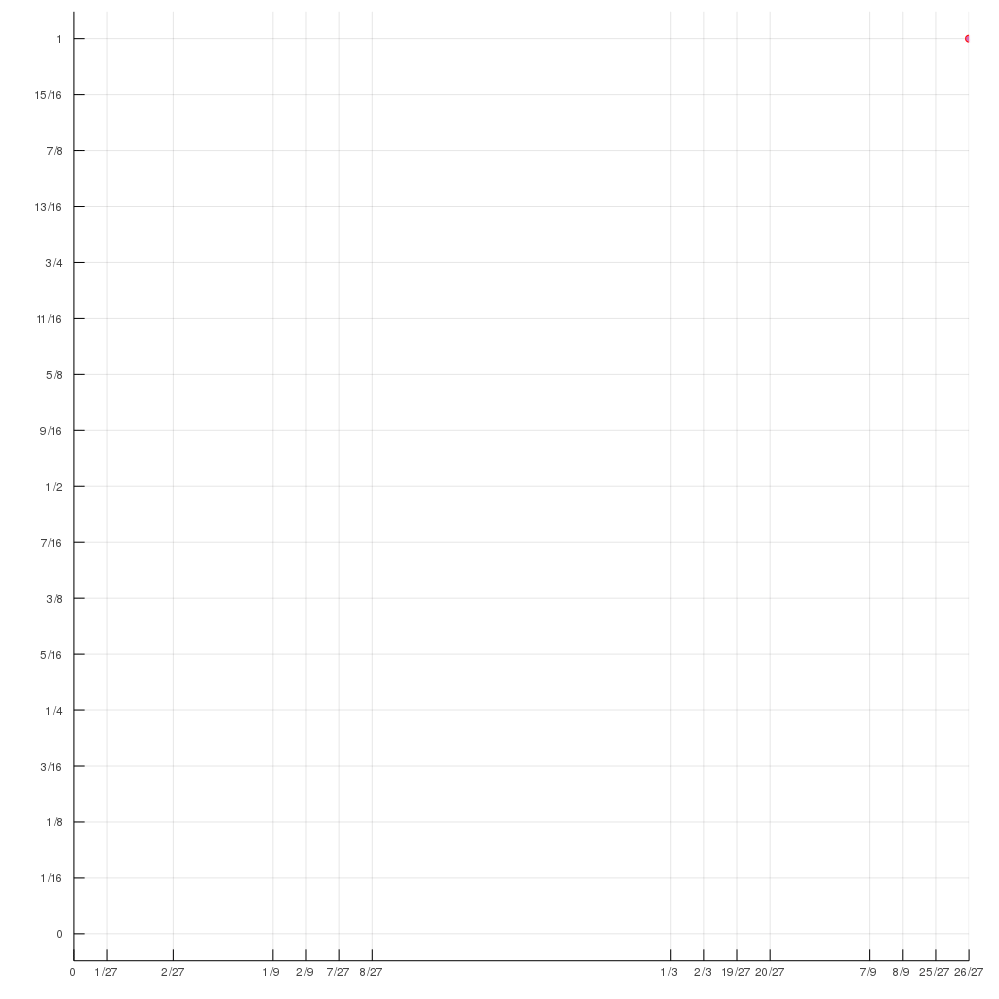

In [6]:
using Plots

n = 750

x = Array(0:1/750:1)

anim = @animate for i in 1:n
    
    plt=plot(10,xlim=(0,1), xticks=([0, 1/27, 1/9, 2/9, 7/27, 8/27, 1/3, 2/3, 19/27, 20/27, 7/9, 8/9, 25/27, 26/27, 1], ["0", "1/27", "2/27", "1/9", "2/9", "7/27", "8/27", "1/3", "2/3", "19/27", "20/27", "7/9", "8/9", "25/27", "26/27", "1"]), yticks=([0, 1/16, 1/8, 3/16, 1/4, 5/16, 3/8, 7/16, 1/2, 9/16, 5/8, 11/16, 3/4, 13/16, 7/8, 15/16, 1], ["0", "1/16", "1/8", "3/16", "1/4", "5/16", "3/8", "7/16", "1/2", "9/16", "5/8", "11/16", "3/4", "13/16", "7/8", "15/16", "1"]), c=:blue, size=(1000, 1000), aspect_ratio=1,legend=false)
    
    t = x[1:i]
f0(t) = t

#plot!(t, f0, c=:black, legend=false)

    
    function heaviside(t)
   0.5 * (sign(t) + 1)
end

function interval(t, a, b)
   heaviside(t-a) - heaviside(t-b)
end

function f1(t)
   3/2 .* t .* interval(t,0,1/3) + 1/2 .* interval(t, 1/3,2/3)+ (3/2 .* t - 1/2) .* interval(t, 2/3,1+0.0000001)
end


plot!(t, f1, c=:purple, legend=false)    
    
    
        function heaviside(t)
   0.5 * (sign(t) + 1)
end

function interval(t, a, b)
   heaviside(t-a) - heaviside(t-b)
end

function f2(t)
   9/4 .* t .* interval(t,0,1/9) + 1/4 .* interval(t, 1/9,2/9)+ (9/4 .* t - 1/4) .* interval(t, 2/9,1/3)+1/2 .* interval(t, 1/3,2/3) + (9/4 .* t -1) .* interval(t, 2/3,7/9) + 3/4 .* interval(t, 7/9,8/9) + (9/4 .*t -5/4) .* interval(t, 8/9,1+0.00001)
end
    
plot!(t, f2, c=:blue, legend=false)   
    
    
    
    
    function heaviside(t)
   0.5 * (sign(t) + 1)
end

function interval(t, a, b)
   heaviside(t-a) - heaviside(t-b)
end

function f3(t)
   27/8 .* t .* interval(t,0,1/27) + 1/8 .* interval(t, 1/27, 2/27)+(27/8 .* t - 1/8) .* interval(t, 2/27,1/9) + 1/4 .* interval(t, 1/9,2/9) + (27/8 .* t - 1/2) .* interval(t, 2/9,7/27) + 3/8 .* interval(t, 7/27,8/27) + (27/8 .*t -5/8) .* interval(t, 8/27,1/3) + 1/2 .* interval(t, 1/3, 2/3) + (27/8 .*t -7/4) .* interval(t, 2/3,19/27) + 5/8 .* interval(t, 19/27,20/27)+(27/8 .*t -15/8) .* interval(t, 20/27,7/9) + 3/4 .* interval(t, 7/9, 8/9) + (27/8 .*t -9/4) .* interval(t, 8/9, 25/27) + 7/8 .* interval(t, 25/27,26/27) + (27/8 .*t -19/8) .* interval(t, 26/27,1+0.00001)
end
    
plot!(t, f3, c=:green, legend=false)   
    
    
    
    
       function heaviside(t)
   0.5 * (sign(t) + 1)
end

function interval(t, a, b)
   heaviside(t-a) - heaviside(t-b)
end

function f4(t)
   81/16 .* t .* interval(t,0,1/81) + 1/16 .* interval(t, 1/81, 2/81)+(81/16 .* t - 1/16) .* interval(t, 2/81, 1/27) + 1/8 .* interval(t, 1/27,2/27) + (81/16 .* t - 1/4) .* interval(t, 2/27,7/81) + 3/16 .* interval(t, 7/81,8/81) + (81/16 .*t -5/16) .* interval(t, 8/81, 1/9) + 1/4 .* interval(t, 1/9, 2/9) + (81/16 .*t -7/8) .* interval(t, 18/81,19/81) + 5/16 .* interval(t, 19/81,20/81) + (81/16 .*t -15/16) .* interval(t, 20/81,7/27) + 3/8 .* interval(t, 7/27, 8/27) + (81/16 .*t -9/8) .* interval(t, 8/27, 25/81) + 7/16 .* interval(t, 25/81,26/81) + (81/16 .*t -19/16) .* interval(t, 26/81,1/3) + 1/2 .* interval(t, 1/3, 2/3) + (81/16 .*t -23/8) .* interval(t, 2/3,55/81) + 9/16 .* interval(t, 55/81,56/81) + (81/16 .*t - 47/16) .* interval(t, 56/81,19/27) + 5/8 .* interval(t, 19/27,20/27) + (81/16 .*t -25/8) .* interval(t, 20/27,61/81) + 11/16 .* interval(t, 61/81,62/81) + (81/16 .*t -51/16) .* interval(t, 62/81,7/9) + 3/4 .* interval(t, 7/9,8/9) + (81/16 .*t -15/4) .* interval(t, 8/9,73/81) + 13/16 .* interval(t, 73/81,74/81) + (81/16 .*t -61/16) .* interval(t, 74/81,25/27) + 7/8 .* interval(t, 25/27,26/27) + (81/16 .*t -4) .* interval(t, 26/27, 79/81) + 15/16 .* interval(t, 79/81,80/81) + (81/16 .*t -65/16) .* interval(t, 80/81,1+0.0001)                                                                                                                                                                                                    
end
    
plot!(t, f4, c=:red, legend=false)    
    
    
    
    
   scatter!([x[end]], markerstrokecolor=:red)
    

end
gif(anim)
